**Willkommen zum Tutorial für Pandas. Nach diesem Tutorial werdet ihr sicherer im Umgang mit Daten in Python sein, sämtliche Machine Learning Algorithmen einfacher anwenden können und kaum noch Excel Tabellen benötigen.**

Das Tutorial ist wie folgt gegliedert:
    
    1. Allgemeines zum Objekt pd.DataFrame
    2. Allgemeines zum Objekt pd.Series
    3. Verbindung zwischen Series und DataFrames
    4. Cooles Zeug

**Allgemeines über DataFrames** 
  
Ein DataFrame ist ein Objekt mit Zeilen und Spalten und enthält Daten. Im Gegensatz zum zweiten häufig verwendeten Datentyp, dem Numpy-Array, kann die Tabelle in Pandas eher als Excel-Tabelle anstatt als Matrix angesehen werden. Viele Dinge gehen äquivalent mit np.arrays und mit pd.DataFrames, einige Dinge haben Vor- und Nachteile. Die beiden Datentypen lassen sich einfach ineinander umwandeln. Hier liegt der Fokus alleine auf den DataFrames.
Wir erstellen ein Dataframe aus 3 Listen mit je 3 Datenpunkten:

In [31]:
import pandas as pd # Konvention: Immer als "pd" importieren
df = pd.DataFrame([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ]) # die Funktion DataFrame erwartet als erstes die 'data',
# und anschließend Informationen zu den Indizes und Spaltennamen. Die 3 Listen müssen daher in einer Liste stehen,
# ansonsten würde [4, 5, 6] als Indizes interpretiert werden (siehe Hilfe: help(pd.DataFrame))
# print(help(pd.DataFrame))

print(df) # im default werden Datenlisten als Zeilenvektoren interpretiert

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9


**Daten als Dict einlesen**

Eine Möglichkeit, die Datenlisten spaltenweise zu interpretieren, ist via Dictionary. Dabei werden auch direkt die Spaltennamen definiert.

In [32]:
df = pd.DataFrame({ 
    "Ware": ["Apfel", "Birne", "Melone", "Zitrone"],
    "Preis": [1, 1.5, 2, 3]
})
print(df) 

      Ware  Preis
0    Apfel    1.0
1    Birne    1.5
2   Melone    2.0
3  Zitrone    3.0


*Anmerkung: Die Integers 1, 2 und 3 werden in Gleitkommazahlen (floats) umgewandelt, weil 1.5 ein float ist und somit der Datentyp der ganzen Spalte zum float gewandelt wird*

Das gleiche kann erreicht werden durch das Übergeben von Listen als Zeilenvektoren und das Spezifieren der Spaltennamen.

In [33]:
df_alternat = pd.DataFrame(
    data = [["Apfel", 1.0], ["Birne", 1.5], ["Melone", 2.0], ["Zitrone", 3.0]],
    columns = ["Ware", "Preis"]
)
print(df_alternat)

      Ware  Preis
0    Apfel    1.0
1    Birne    1.5
2   Melone    2.0
3  Zitrone    3.0


**Indizes**

Die Indizes sowie auch die Spaltennamen können, müssen aber nicht gesetzt werden. Wird nichts gesetzt, dann zählt Python von 0 beginndend durch (s. In[1]). 
Wichtig: Indizes und Spaltennamen zählen nicht zu den Daten. Der erste Eintrag links oben (0,0) ist "Apfel".

In [34]:
df = pd.DataFrame({ 
    "Ware": ["Apfel", "Birne", "Melone", "Zitrone"],
    "Preis": [1, 1.5, 2, 3]
    },
    index=["erste", "zweite", "dritte", "vierte"]
)
print(df)

           Ware  Preis
erste     Apfel    1.0
zweite    Birne    1.5
dritte   Melone    2.0
vierte  Zitrone    3.0


**Spalten und Indizes mit .rename() ändern**

Spaltennamen und Indizes können jederzeit mit der Funktion 'rename' verändert werden. Dabei fällt ein grundlegendes Prinzip auf: 
Veränderungen am Dataframe werden nur in den Output geleitet. Das Dataframe selbst bleibt unverändert. 
Im folgenden wird (1) das originale datenframe geprintet, (2) das veränderte, (3) das nicht veränderte.
Um Änderungen wirksam zu machen, muss eine neue Variable definiert werden oder die alte überschrieben werden (4) oder das Keyword-Argument ```inplace=True``` gesetzt werden, falls die Methode dies zulässt.

In [35]:
df = pd.DataFrame({ 
    "Ware": ["Apfel", "Birne", "Melone", "Zitrone"],
    "Preis": [1, 1.5, 2, 3]
    },
    index=["erste", "zweite", "dritte", "vierte"]
)

print("1. Original")
print(df)

print("\n2. Verändert") # in Python strings steht \n für new line (Zeilenumbruch), \t für Tabulator etc.
print(df.rename(index={"zweite": "b", "dritte": "c"}, # dict mit key=Originaler Name , value=Geänderter Name
                columns={"Preis": "Preis in Euro"}))

print("\n3. Das funktioniert nicht:")
df.rename(index={"zweite": "b", "dritte": "c"}, 
        columns={"Preis": "Preis in Euro"})
print(df) # df ist nicht verändert worden

print("\n4. Neue Variable setzen oder alte überschreiben")
df2 = df.rename(index={"zweite": "b", "dritte": "c"},
                columns={"Preis": "Preis in Euro"})
df = df.rename(index={"zweite": "b", "dritte": "c"},
                columns={"Preis": "Preis in Euro"})
print("df2:\n", df2)    
print("\ndf:\n", df
)

1. Original
           Ware  Preis
erste     Apfel    1.0
zweite    Birne    1.5
dritte   Melone    2.0
vierte  Zitrone    3.0

2. Verändert
           Ware  Preis in Euro
erste     Apfel            1.0
b         Birne            1.5
c        Melone            2.0
vierte  Zitrone            3.0

3. Das funktioniert nicht:
           Ware  Preis
erste     Apfel    1.0
zweite    Birne    1.5
dritte   Melone    2.0
vierte  Zitrone    3.0

4. Neue Variable setzen oder alte überschreiben
df2:
            Ware  Preis in Euro
erste     Apfel            1.0
b         Birne            1.5
c        Melone            2.0
vierte  Zitrone            3.0

df:
            Ware  Preis in Euro
erste     Apfel            1.0
b         Birne            1.5
c        Melone            2.0
vierte  Zitrone            3.0


Diese Erkenntnis ist wichtig: Die allermeisten Operationen wie df+10, df*5, df.rename, df.reshape, df.transpose etc. 
lassen das DataFrame unverändert und geben lediglich die veränderte Version zurück. Wenn diese Zurückgabe nirgends 
weiterverarbeitet oder gespeichert wird, so geht sie verloren. Soll das df_bsp dauerhaft verändert werden, so muss man 
df_bsp = df_bsp + 10 ; df_bsp = df_bsp.transpose() ; etc. 
schreiben

**Zugriffe auf einzelne oder mehrere Elemente**

Es gibt im Wesentlichen 2 Möglichkeiten, um auf die Daten zuzugreifen: Über die Namen der Zeilen und Spalten ,
oder über die Integers via .iloc[] (integer location).

*Remember: Zugriffe bei Listen durch integers, z.B.* 
```python 
list1 = [1,2,3,4]
list1[0] # gibt 1
list1[1:3] # gibt [2,3]
list1[0:3] # [1,2,3] und ist gleich wie list1[:3]
list1[:] # gibt ganze list1, Python zählt hier von 0 bis 3.
```
* und range(1,10) in Python exkludiert die 10, läuft also von 1 bis 9.*

In [36]:
print("--ganze Spalte--")
print(df["Preis in Euro"]) # Zugriff auf die Spalten via Spaltenname
print("\n--ein Element--")
print(df["Preis in Euro"]["erste"]) # Zugriff auf ein Element via Spalten- und Indexname
print("\n--ein Element mit iloc--")
print(df.iloc[0,1]) # Es gilt immer df.iloc['Zeilen', 'Spalten']
print("\n--ganze erste Zeile mit iloc--")
print(df.iloc[0]) 
print("\n--zweite Spalte mit iloc--")
print(df.iloc[:,1]) # Hier [:,1] also [:] für alle Zeilen [1] für 2. Spalte
print("\n--Auswahl mit iloc--")
print(df.iloc[[0,2], :]) # gibt in den Spalten 1 und 3 (extra Klammer) jeweils alle Zeilen [:]. 
# print(df.iloc[:, :]) ist das gleiche wie print(df)

--ganze Spalte--
erste     1.0
b         1.5
c         2.0
vierte    3.0
Name: Preis in Euro, dtype: float64

--ein Element--
1.0

--ein Element mit iloc--
1.0

--ganze erste Zeile mit iloc--
Ware             Apfel
Preis in Euro        1
Name: erste, dtype: object

--zweite Spalte mit iloc--
erste     1.0
b         1.5
c         2.0
vierte    3.0
Name: Preis in Euro, dtype: float64

--Auswahl mit iloc--
         Ware  Preis in Euro
erste   Apfel            1.0
c      Melone            2.0


**Pandas Series (1/3)**

Es fällt auf, dass manchmal unter den Daten so etwas wie "Name: Preis in Euro, dtype: float64" steht. 
Das liegt daran, dass ein anderer Datentyp geprinted wurde. Wie überall, werden die Klammern von innen nach außen ausgeführt.
Oben im zweiten Beispiel (für ein Element) wird bei print(df["Preis in Euro"]["erste"]) zuerst das Element im df gefunden und dann 
dieses an die print-Funktion übergeben. Daher steht im Output einfach nur "1.0" und der Datentyp ist float64.
Der zweite (von zwei) wichtige Datentyp in Pandas ist die Serie. Diese ist ein DataFrame mit nur einer Spalte.
Wird ein solches geprintet, so wird automatisch sein Name und der enthaltene Datentyp mit ausgegeben.

In [37]:
print("type(df):\n ", type(df))
preise = df["Preis in Euro"]
print("type(Serie):\n ", type(preise))
print("Ganze Serie:\n", preise)

type(df):
  <class 'pandas.core.frame.DataFrame'>
type(Serie):
  <class 'pandas.core.series.Series'>
Ganze Serie:
 erste     1.0
b         1.5
c         2.0
vierte    3.0
Name: Preis in Euro, dtype: float64


**Pandas Series (2/3)**

Während ein Dataframe als Eigenschaften die Zeilen- und Spaltennamen hat, hat die Serie nur einen einzigen Namen: Den Namen ihrer Spalte. Die Indizes sind die gleichen.

*Anmerkung: Nicht verwirren lassen vom Wort 'Index' in der Ausgabe. Dies liegt daran, dass die columns bzw. index keine Liste, sondern ein Pandas-index-objekt ist. Immerhin zeigt es auf eine ganze Zeile bzw. Spalte und trägt damit mehr Informationen, als nur eine Liste* 

In [38]:
print("Dataframe:\n Columns:", df.columns, "\n Indizes:", df.index)
print("Serie:\n Name:", preise.name, "\n Indizes:", preise.index)
print("Serie komplett:\n", preise)

Dataframe:
 Columns: Index(['Ware', 'Preis in Euro'], dtype='object') 
 Indizes: Index(['erste', 'b', 'c', 'vierte'], dtype='object')
Serie:
 Name: Preis in Euro 
 Indizes: Index(['erste', 'b', 'c', 'vierte'], dtype='object')
Serie komplett:
 erste     1.0
b         1.5
c         2.0
vierte    3.0
Name: Preis in Euro, dtype: float64


**Pandas Series (3/3)**

Wie oben gesehen erhält man eine Serie durch das Extrahieren einer Spalte aus dem DataFrame.
Man kann Serien auch direkt definieren (das wird vielleicht sogar häufiger gemacht als der Weg über das df)

In [39]:
serie = pd.Series(
    data=[1, 5, 10, 120], 
    index=["10 Sekunden", "1 Minute", "3 Stunden", "1 Tag"],
    name="Messpunkte")
print(serie)

10 Sekunden      1
1 Minute         5
3 Stunden       10
1 Tag          120
Name: Messpunkte, dtype: int64


**Serien vs. DataFrames**

Wie wir aus dem df eine Serie bekommen, haben wir gesehen. Nun wollen wir die Messpunkte zum Frame hinzufügen.
Man kann jederzeit eine neue Spalte im DataFrame erzeugen. Dabei muss die Länge der Liste mit den Zeilen im df übereinstimmen.

In [40]:
df["neue Spalte"] = [10, 11, 12, 13]
print(df)
# df["neue Spalte"] = [10, 11, 12, 13, 14, 15, 16] gäbe einen Fehler

           Ware  Preis in Euro  neue Spalte
erste     Apfel            1.0           10
b         Birne            1.5           11
c        Melone            2.0           12
vierte  Zitrone            3.0           13


Möchte man das gleiche mit der Serie machen, so erhält man NAN für 'Not a number'. Dieser Wert wird eingetragen, wenn Python 
keinen vernünftigen Wert erhalten kann. Z.B. beim Teilen durch 0, bei Dingen wie "abc"+10, oder wie hier beim Nichtüberinstimmen von Indizes. Wir können NANs mit der Methode .dropna() entfernen, das argument ```axis``` gibt dabei an, ob Reihen(axis=0) oder Spalten(axis=1) mit NANs entfernt werden sollen.

In [41]:
df["neue Spalte"] = serie
print(df, end="\n\n")

df_ohne_nan_reihen = df.dropna(axis=0)
print(df_ohne_nan_reihen, end="\n\n") # Leerer Dataframe denn jede Reihe enthielt eine NAN

df_ohne_nan_spalten = df.dropna(axis=1)
print(df_ohne_nan_spalten)


           Ware  Preis in Euro  neue Spalte
erste     Apfel            1.0          NaN
b         Birne            1.5          NaN
c        Melone            2.0          NaN
vierte  Zitrone            3.0          NaN

Empty DataFrame
Columns: [Ware, Preis in Euro, neue Spalte]
Index: []

           Ware  Preis in Euro
erste     Apfel            1.0
b         Birne            1.5
c        Melone            2.0
vierte  Zitrone            3.0


Eine Möglichkeit ist das Ausgeben der Werte mittels serie.values. Es gibt ein numpy array mit den Werten zurück. 
Dieses können wir verwenden, um die neue Spalte zu füllen. 

Allgemein funktionieren 1-dimensionale np.arrays wie Listen und allgemein vertragen sich np.arrays und Pandas-Datentypen sehr gut miteinander.

In [42]:
arr = serie.values 
print(type(arr))
df["neue Spalte"] = arr 
print(df)
# oder kürzer:
df["neue Spalte"] = serie.values 
print(df)

<class 'numpy.ndarray'>
           Ware  Preis in Euro  neue Spalte
erste     Apfel            1.0            1
b         Birne            1.5            5
c        Melone            2.0           10
vierte  Zitrone            3.0          120
           Ware  Preis in Euro  neue Spalte
erste     Apfel            1.0            1
b         Birne            1.5            5
c        Melone            2.0           10
vierte  Zitrone            3.0          120


Nun haben wir die nötigen Basics, um mit den DataFrames zu arbeiten. Bedenkt bitte, dass es gerade in Python viele Wege zum Ziel gibt. Wenn ihr etwas lest wie "df.loc[df.index[2],df.columns[0:2]]" dann ist das nicht richtiger oder falscher. Nehmt das, was für euch am besten ist. Hier wurde aus Zeitgründen nur eine Möglichkeite vorgestellt.

Um endlich mit den Daten zu arbeiten, wird das df noch einmal neu erzeugt.

In [43]:
df = pd.DataFrame({ 
    "Ware": ["Apfel", "Birne", "Melone", "Zitrone"],
    "Preis": [1, 1.5, 2, 3]
    },
    index=["erste", "zweite", "dritte", "vierte"]
)
print(df)

           Ware  Preis
erste     Apfel    1.0
zweite    Birne    1.5
dritte   Melone    2.0
vierte  Zitrone    3.0


**Cooles Zeug**

Es gäbe eine Steuer auf Obst in höhe von 5%. 

In [44]:
df["Preis"] = df["Preis"]*1.05 # df["Preis"] muss überschrieben werden. Ansonsten ist die Änderung unwirksam
print(df)

           Ware  Preis
erste     Apfel  1.050
zweite    Birne  1.575
dritte   Melone  2.100
vierte  Zitrone  3.150


Uns interessiert die Summe aller Preise, der Mittelwert, die Standardabweichung und die Varianz.

*Remember: df["Preis"] ist eine pd.series, daher kann es alles, was eine Serie kann.*

In [45]:
print("Summe: ", df["Preis"].sum()) # hier wird nicht df["Preis"] = df["Preis"].sum() gemacht
print("Mittel: ", df["Preis"].mean()) # Die Änderung 'lebt' also nur innerhalb der Klammern von print
print("Std: ", df["Preis"].std())
print("Var: ", round(df["Preis"].var(), 3)) # rundet das Ergebnis auf 3 Nachkommastellen

Summe:  7.875
Mittel:  1.96875
Std:  0.8966081920214649
Var:  0.804


Wir möchten gerne wissen, welche Waren teurer als 2 Euro sind


In [46]:
print( df["Preis"] > 2 )

erste     False
zweite    False
dritte     True
vierte     True
Name: Preis, dtype: bool


Das ist unbefriedigend, da sich diese Tabelle nur schwer interpretieren lässt. Jedoch können wir den Output [False, False, True, True] nutzen, um genau diejenigen Einträge anzeigen zu lassen, die 'True' sind. Wie man am Name und dtype sehen kann, ist der Output der Abfrage (df["Preis"] > 2) wieder eine pd.Serie , die den Datentyp 'bool' (Wahrheitswert) trägt. Die Indizes sind die gleichen wie im DF. Daher zeigt die folgende Abfrage alle Zeilen an, bei denen der jeweilige Index 'True' ist.

In [47]:
print("Typ:\n", type(df["Preis"] > 2))
print("\nAbfrage:\n", df[df["Preis"] > 2]) # quasi im Prinzip: df["erste":False, ..., "vierte":True]

Typ:
 <class 'pandas.core.series.Series'>

Abfrage:
            Ware  Preis
dritte   Melone   2.10
vierte  Zitrone   3.15


Das gleiche geht auch mit Strings (Datentypen, verschachtelten Wahrheitstest, ...) um alle Waren, die den
Substring "one" enthalten, anzuzeigen.

In [48]:
print(df[df["Ware"].str.contains("one")])

           Ware  Preis
dritte   Melone   2.10
vierte  Zitrone   3.15


Zwei nützliche interne-Pythonkommandos sind hier 'any' und 'all'. Sie geben 'True' oder 'False' wenn in einem gesamtem Datentyp irgeneines bzw. alle der enthaltenen Datenpunkte der Abfrage entspricht.

In [49]:
abfrage = df["Ware"].str.contains("one")
print("Die Abfrage ergibt eine boolean-Serie:\n", abfrage)
print("\nSind alle wahr?:\n", all(abfrage))
print("\nIst mindestens einer wahr?:\n", any(abfrage))


Die Abfrage ergibt eine boolean-Serie:
 erste     False
zweite    False
dritte     True
vierte     True
Name: Ware, dtype: bool

Sind alle wahr?:
 False

Ist mindestens einer wahr?:
 True


Sollen die Werte einer Spalte von einen Wert zu einem anderen transformiert werden, abhängig davon was der aktuelle Wert ist, dann lässt sich das mit der 'map'-Methode bewerkstelligen.

In [56]:
print(abfrage.map({False: "Ohne Einsen", True: "Mit Einsen"}))

erste     Ohne Einsen
zweite    Ohne Einsen
dritte     Mit Einsen
vierte     Mit Einsen
Name: Ware, dtype: object


**Plotten**

Wir nutzen aus, dass 
a) df[Spaltenname] eine Serie ergibt und diese von Python bei Bedarf automatisch in ein 1D-Array umgewandelt wird

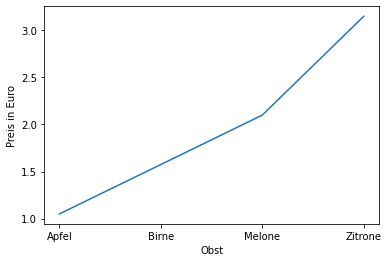

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # eine von mehreren Möglichkeiten Matplolib zu verwenden: Erstelle Figur und Subplot
ax.set_xlabel("Obst") # setze x-Labels
ax.set_ylabel("Preis in Euro") # setze y-Labels
ax.plot(df["Ware"], df["Preis"]) # plotte x, y

**Plotten (2)**

Wir nutzen weiterhin aus, dass 
b) df[Spaltenname]*100 nur temporär alle Einträge der Spalte mit 100 multipliziert. Das originale DataFrame bleibt unverändert

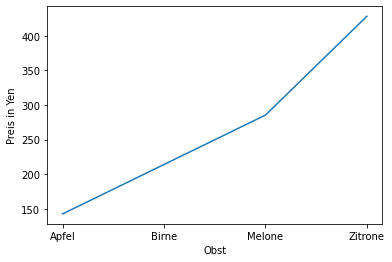

In [51]:
umrechnung = 135.93 # 1 Euro sind 135.93 Japanische Yen
fig, ax = plt.subplots()
ax.set_xlabel("Obst")
ax.set_ylabel("Preis in Yen")
ax.plot(df["Ware"], df["Preis"]*umrechnung)

Das gleiche geht auch mit auf 1 normierten Preisen

Mittelwert der normierten Preise:  1.0


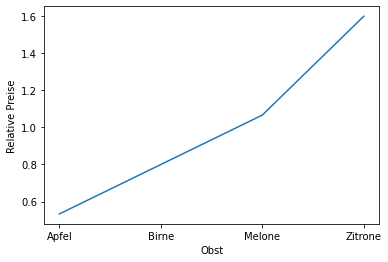

In [52]:
fig, ax = plt.subplots()
ax.set_xlabel("Obst")
ax.set_ylabel("Relative Preise")
ax.plot(df["Ware"], df["Preis"]/df["Preis"].mean())

# zur Kontrolle: Der Mittelwert der normierten Preise ist 1
print(
    "Mittelwert der normierten Preise: ",
    (df["Preis"]/df["Preis"].mean()).mean()
)

Als letztes soll der Dataframe gespeichert werden. Dies kann u.a. als Text, als csv oder als Excel-Tabelle geschehen.

In [53]:
#pfad = "test_tabelle.csv" # Achtung! Nur Unkommentieren und Zelle ausführen, wenn ihr keine wichtigen Daten mit dem Namen in pfad besitzt
df.to_csv(pfad, sep=";") # sep trennt die Einträge mit Semikolons
# Laden
df_geladen = pd.read_csv(pfad, sep=";", index_col=0) # sep spezifiziert, wie die Einträge getrennt werden und
# index_col gibt die Spaltennummer derjenigen Spalte an, die als Index und nicht als Einträge angeshen werden sollen
print(df_geladen)
df_schlechtgeladen = pd.read_csv(pfad, sep=" ") # erwartet Leerzeichentrennung. Indizes gehen default auf [0,1,..] 
print("\n Schlecht:\n", df_schlechtgeladen)

# Lösche die Tabelle wieder
import os
os.remove(pfad)

           Ware  Preis
erste     Apfel  1.050
zweite    Birne  1.575
dritte   Melone  2.100
vierte  Zitrone  3.150

 Schlecht:
                          ;Ware;Preis
0                   erste;Apfel;1.05
1    zweite;Birne;1.5750000000000002
2                  dritte;Melone;2.1
3  vierte;Zitrone;3.1500000000000004




Damit ist der Panda Crash-Curs beendet. Es gibt unzählige weitere Funtionen, die vor allem in Kombination mit den np.arrays
komplizierte Datentransformationen in nur wenigen Zeilen ermöglichen. Ist eine Exceltabelle einmal als df eingelesen, so lässt sich schnell deskriptive Statistik damit machen. Mit den Abfragen und matplotlib lässt sich schnell eine Auswahl plotten.

Das schöne hierbei ist: Wenn das Pythonscript einmal steht (Achsenbeschriftungen, Schriftgrößen, Abfragen vom df etc.), dann werden neue Daten aus bspw. weiteren Messungen nach Wünschen behandelt. Lediglich der Pfad zur neuen Exceltabelle muss geändert werden. So werden verglichen mit Word und Excel schönere Plots schneller mit weniger Frustration erhalten. 